<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html hw7.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# PHY321: Classical Mechanics 1
**Homework 7, Bergen Kendziorski**

### Introduction to homework 7

In this week's homework we will apply our insights about harmonic
oscillations. The relevant material to survey is chapter 5 of Taylor.
See also the slides from [week 11](https://mhjensen.github.io/Physics321/doc/pub/week10/html/week10.html).

We have also added an exercise (exercise 2) related to our discussion of two-body problems. 
The relevant reading background for exercise 2 is given by sections 8.1-8.2 of Taylor.

### Exercise 1 (80 pts), the mathematical pendulum

Relevant reading here is Taylor chapter 5 and the lecture notes on oscillations from [week 11](https://mhjensen.github.io/Physics321/doc/pub/week10/html/week10.html).

The angular equation of motion of the pendulum is given by
Newton's equation and with no external force it reads

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
  ml\frac{d^2\theta}{dt^2}+mgsin(\theta)=0,
\label{_auto1} \tag{1}
\end{equation}
$$

with an angular velocity and acceleration given by

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
     v=l\frac{d\theta}{dt},
\label{_auto2} \tag{2}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
     a=l\frac{d^2\theta}{dt^2}.
\label{_auto3} \tag{3}
\end{equation}
$$

We do however expect that the motion will gradually come to an end
due a viscous drag torque acting on the pendulum. 
In the presence of the drag, the above equation becomes

<!-- Equation labels as ordinary links -->
<div id="eq:pend1"></div>

$$
\begin{equation}
   ml\frac{d^2\theta}{dt^2}+\nu\frac{d\theta}{dt}  +mgsin(\theta)=0,
\label{eq:pend1} \tag{4}
\end{equation}
$$

where $\nu$ is now a positive constant parameterizing the viscosity
of the medium in question. In order to maintain the motion against
viscosity, it is necessary to add some external driving force. 
We choose here a periodic driving force. The last equation becomes then

<!-- Equation labels as ordinary links -->
<div id="eq:pend2"></div>

$$
\begin{equation}
   ml\frac{d^2\theta}{dt^2}+\nu\frac{d\theta}{dt}  +mgsin(\theta)=Asin(\omega t),
\label{eq:pend2} \tag{5}
\end{equation}
$$

with $A$ and $\omega$ two constants representing the amplitude and 
the angular frequency respectively. The latter is called the driving frequency.

* 1a (10pts)

Rewrite Eqs. ([4](#eq:pend1)) and ([5](#eq:pend2)) as dimensionless
equations in time. 

* 1b (40pts)

Write then a code which solves Eq. ([4](#eq:pend1)) using the
Euler-Cromer method or for example the fourth-order Runge Kutta method. Perform
calculations for at least ten periods with $N=100$, $N=1000$ and
$N=10000$ integration points/discretization points in time (such points are often called mesh points) and values of $\nu = 1$, $\nu = 5$ and $\nu
=10$.  Set $l=1.0$ m, $g=1$ m/s$^2$ and $m=1$ kg.  Choose as initial
conditions $\theta(0) = 0.2$ (radians) and $v(0) = 0$ (radians/s).
Make plots of $\theta$ (in radians) as function of time and phase
space plots of $\theta$ versus the velocity $v$.  Check the stability
of your results as functions of time and number of discretization/mesh points.  Which
case corresponds to damped, underdamped and overdamped oscillatory
motion?  Comment your results.

* 1c (30pts) 

Now we switch to Eq. ([5](#eq:pend2)) for the rest of the exercise. Add
an external driving force and set $l=g=1$, $m=1$, $\nu = 1/2$ and
$\omega = 2/3$.  Choose as initial conditions $\theta(0) = 0.2$ and
$v(0) = 0$ and $A=0.5$ and $A=1.2$.  Make plots of $\theta$ (in
radians) as function of time for at least 300 periods and phase space
plots of $\theta$ versus the velocity $v$. Choose an appropriate time
step. Comment and explain the results for the different values of $A$.

* 1d **optional exercise** (20pts bonus) 

Keep now the constants from the previous exercise fixed but
set now $A=1.35$, $A=1.44$ and $A=1.465$. Plot $\theta$ (in radians)
as function of time for at least 300 periods for these values of $A$
and comment your results.

* 1e **optional exercise** (20pts bonus)

We want to analyse further these results by making phase space plots
of $\theta$ versus the velocity $v$ using only the points where we
have $\omega t=2n\pi$ where $n$ is an integer. These are normally
called the drive periods.  This is an example of what is called a
Poincare section and is a very useful way to plot and analyze the
behavior of a dynamical system. Comment your results.

In [1]:
## 1b)
%matplotlib inline
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

#these I'm defining as global variables so that I can easily put everything into functions (makes later parts easier)
DeltaT = 0.001
tfinal = 70 # in dimensionless time
n = ceil(tfinal/DeltaT)
Omegatilde = 0.5
Ftilde = 0.0
g = 1 #constant
l = 1 #constant
m = 1 #constant
visc = 1 #will change
title = "change later"

points = False #to prevent stuff from happening until part 1e

In [2]:
#The first function is taken from class notes.
#I'm using the RK4 method, since it's more numerically precise than euler-cromer
#I'm keeping the variable x for convenience, but this is actually theta.
#function declarations
def RK4(v,x,t,n,Force):
    for i in range(n-1):
# Setting up k1
        k1x = DeltaT*v[i]
        k1v = DeltaT*Force(v[i],x[i],t[i])
# Setting up k2
        vv = v[i]+k1v*0.5
        xx = x[i]+k1x*0.5
        k2x = DeltaT*vv
        k2v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k3
        vv = v[i]+k2v*0.5
        xx = x[i]+k2x*0.5
        k3x = DeltaT*vv
        k3v = DeltaT*Force(vv,xx,t[i]+DeltaT*0.5)
# Setting up k4
        vv = v[i]+k3v
        xx = x[i]+k3x
        k4x = DeltaT*vv
        k4v = DeltaT*Force(vv,xx,t[i]+DeltaT)
# Final result
        x[i+1] = x[i]+(k1x+2*k2x+2*k3x+k4x)/6.
        v[i+1] = v[i]+(k1v+2*k2v+2*k3v+k4v)/6.
        t[i+1] = t[i] + DeltaT

def pend_acc(v,x,t):
    #need to return acceleration from part a, need to divide by mass from the force
    return (-sin(x) - visc*v + Ftilde*sin(Omegatilde*t)) #l,m,g are all 1 so I just ignored these for simplicity

def run_rk4():
    # set up arrays for t, v, and x
    t = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n) #actually theta, I just found it easier to keep x

    x0 =  0.2 #radians 
    v0 = 0.0 #radians per second
    x[0] = x0
    v[0] = v0
    
    # Start integrating using the RK4 method
    # Note that we define the force function as a pendulum force (actually accleration)
    RK4(v,x,t,n,pend_acc)
    
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.plot(t,x)
    plt.xlabel("time")
    plt.ylabel("theta")
    plt.title(title)

    plt.subplot(1,2,2)
    plt.plot(x,v)
    plt.xlabel("theta (radians)")
    plt.ylabel("velocity (radians/second)")
    plt.title(title)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    if(points): #for part 1e
        x_data = []
        v_data = []
        for i in range(len(t)):
            current = t[i]*Omegatilde/(2*pi)
            if (floor(current + .01) == ceil(current - .01)): #checking to see if it's close to an integer
                x_data.append(x[i])
                v_data.append(v[i])
        plt.scatter(x_data,v_data)
        plt.xlabel("theta (rad)")
        plt.ylabel("v (rad/s)")
        plt.title(title)
        plt.show()

With all of that set up, we can run the above functions and see what we get. To start off with, I'll set my viscosity to 0 and have a lot of mesh points to verify that everything is working properly. We expect to see just a sinosoidal function with no damping for theta over time, because I've removed all resistance and have no driving force. We expect an oval (not spiraling inward or outward) for our phase space plot.

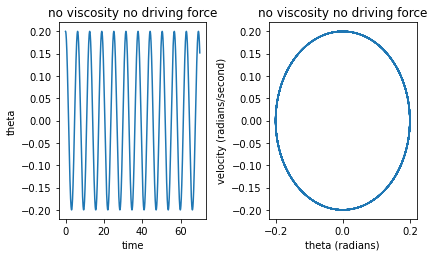

In [3]:
visc = 0
Ftilde = 0
n = ceil(tfinal/DeltaT)
title = "no viscosity no driving force"
run_rk4()

With this working, we can try the more fun stuff with varying number of mesh points and values for viscosity.

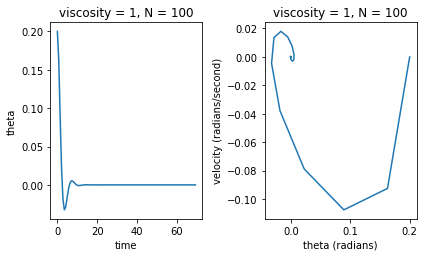

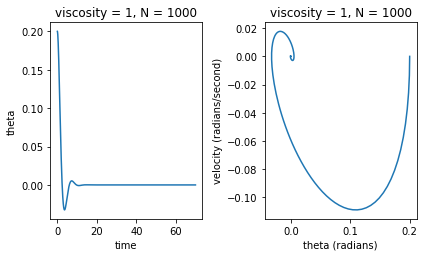

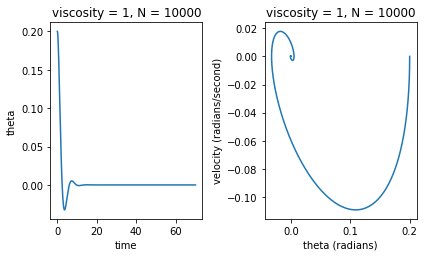

In [4]:
visc = 1
DeltaT = 0.7
n = ceil(tfinal/DeltaT)
title = "viscosity = 1, N = "+str(n)
run_rk4()

DeltaT = 0.07
n = ceil(tfinal/DeltaT)
title = "viscosity = 1, N = "+str(n)
run_rk4()

DeltaT = 0.007
n = ceil(tfinal/DeltaT)
title = "viscosity = 1, N = "+str(n)
run_rk4()

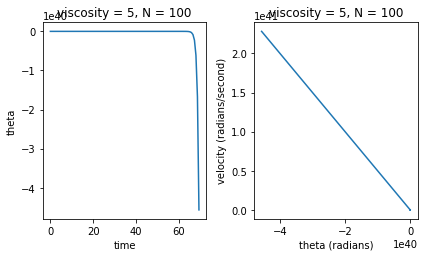

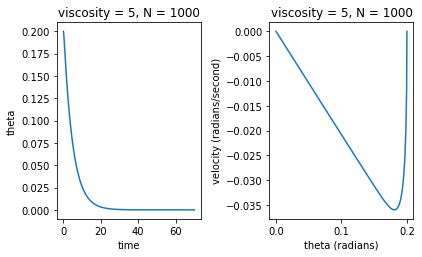

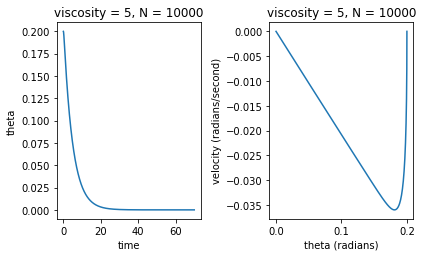

In [5]:
visc = 5
DeltaT = 0.7
n = ceil(tfinal/DeltaT)
title = "viscosity = 5, N = "+str(n)
run_rk4()

DeltaT = 0.07
n = ceil(tfinal/DeltaT)
title = "viscosity = 5, N = "+str(n)
run_rk4()

DeltaT = 0.007
n = ceil(tfinal/DeltaT)
title = "viscosity = 5, N = "+str(n)
run_rk4()

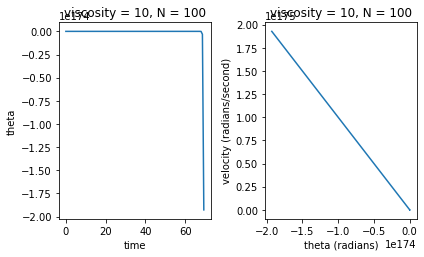

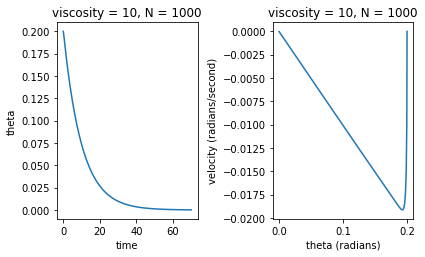

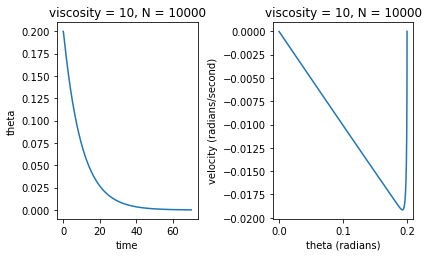

In [6]:
visc = 10
DeltaT = 0.7
n = ceil(tfinal/DeltaT)
title = "viscosity = 10, N = "+str(n)
run_rk4()

DeltaT = 0.07
n = ceil(tfinal/DeltaT)
title = "viscosity = 10, N = "+str(n)
run_rk4()

DeltaT = 0.007
n = ceil(tfinal/DeltaT)
title = "viscosity = 10, N = "+str(n)
run_rk4()

1b analysis: We can see that with viscosity of 5 or 10, our solution is unstable if we only use N=100 integration points. We can also see that viscosity = 1 is the underdamped case, and viscosity = 5 or 10 are overdamped cases. We can solve mathematically for the critical case to be viscosity = 2, which is shown below.

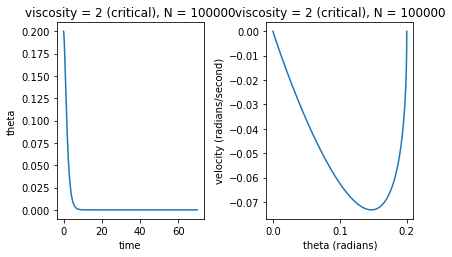

In [7]:
visc = 2
DeltaT = 0.0007
n = ceil(70/DeltaT)
title = "viscosity = 2 (critical), N = "+str(n)
run_rk4()

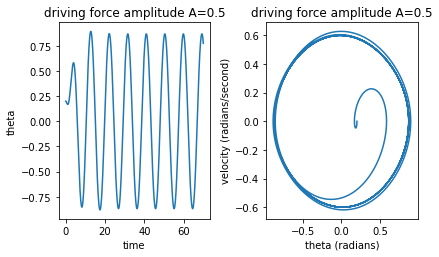

In [8]:
#1c) Switching to having a driving force
#we already have the code allowing us to do this above, just change Ftilde to add driving force amplitude
#l = g = m = 1 as before
#Theta(0)=0.2 rad, v(0)=0 rad/s
#first, I'll plot just a small amount of oscillations to verify it's working
visc = 0.5
Omegatilde = 2/3
Ftilde = 0.5
title = "driving force amplitude A=0.5"
run_rk4()

Looks good! Now we can switch to at least 300 periods as requested, which is helpful for seeing the long term behavior of A=1.2

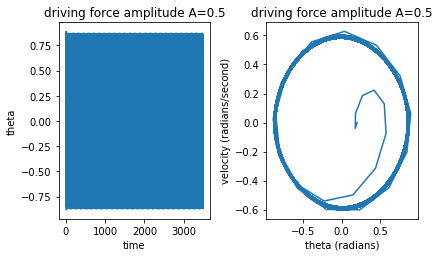

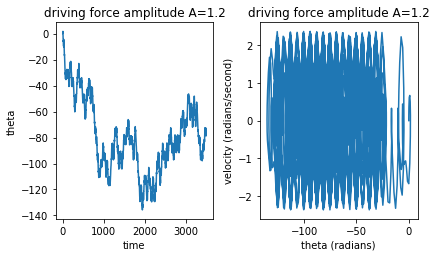

In [9]:
DeltaT = 0.7
tfinal = 3500
n = ceil(tfinal/DeltaT)
Ftilde = 0.5
title = "driving force amplitude A=0.5"
run_rk4()

Ftilde = 1.2
title = "driving force amplitude A=1.2"
run_rk4()

We can see that with A=0.5 we get the expected behavior of all information about initial conditions becoming irrelevant with sufficient time, and the motion is dependent only upon the driving force. With A=1.2, we can see that we actually get relatively chaotic behavior, although this is expected with a large enough driving force on a pendulum.

1d) First, let's set our pendulum to only run for a short period of time so we get a feel for the beginning.

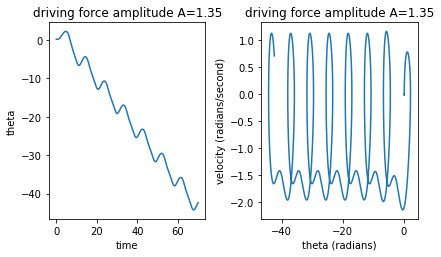

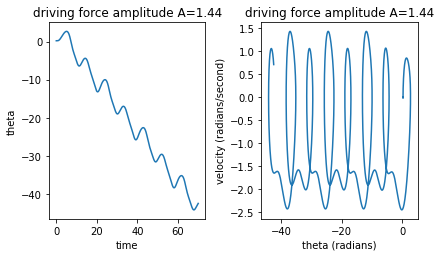

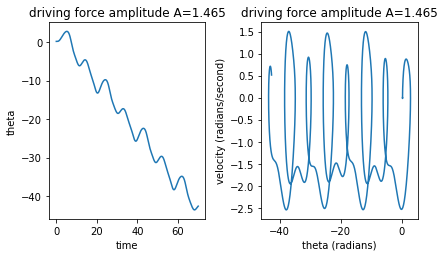

In [10]:
DeltaT = 0.01
tfinal = 70
n = ceil(tfinal/DeltaT)
Ftilde = 1.35
title = "driving force amplitude A=1.35"
run_rk4()

Ftilde = 1.44
title = "driving force amplitude A=1.44"
run_rk4()

Ftilde = 1.465
title = "driving force amplitude A=1.465"
run_rk4()

Ok, now let's zoom out and get the big picture.

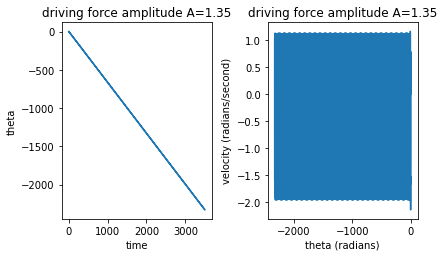

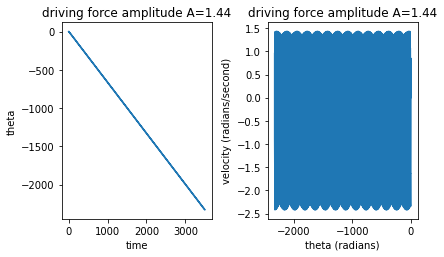

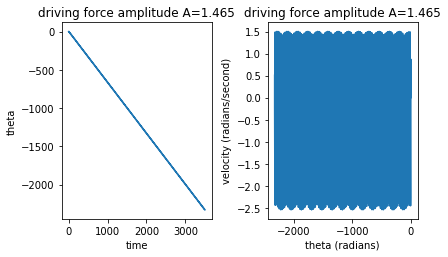

In [11]:
DeltaT = 0.7
tfinal = 3500
n = ceil(tfinal/DeltaT)
Ftilde = 1.35
title = "driving force amplitude A=1.35"
run_rk4()

Ftilde = 1.44
title = "driving force amplitude A=1.44"
run_rk4()

Ftilde = 1.465
title = "driving force amplitude A=1.465"
run_rk4()

1d analysis: Ok, we can see that our theta value just gets increasingly far negative with time. Essentially what's happening is that our pendulum is spinning counterclockwise. We do see the expected behavior of the initial conditions becoming irrelevant and the behavior is dominated by the driving force in the long term. When you look at the signs in the differential equation, what we're having happen is the force accelerates the pendulum counterclockwise. Every time the driving force switches signs, it slows the motion down and is able to briefly turn it clockwise again, but the mean velocity is still in the negative direction.

1e) Plotting poincare section. To do this, I'll have to slightly alter the above code. I just went and did that, and now all I have to do is set points = True. We want to select points where omega * t (in my case Omagetilda * t) is an even integer of pi. Since we're doing this analytically, we'll never have exactly an even integer of pi by having constant time steps, so instead I'll have to set within a tolerance.

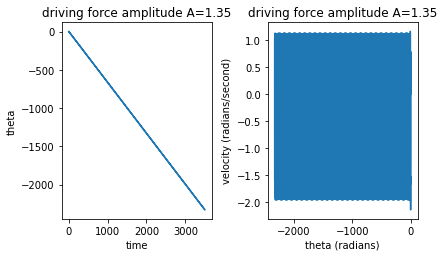

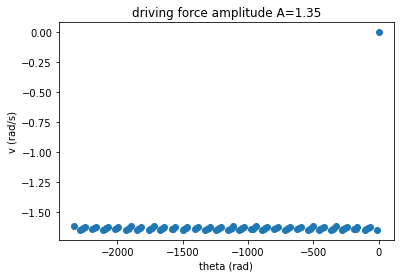

In [12]:
points = True
DeltaT = 0.7
tfinal = 3500
n = ceil(tfinal/DeltaT)
Ftilde = 1.35
title = "driving force amplitude A=1.35"
run_rk4()

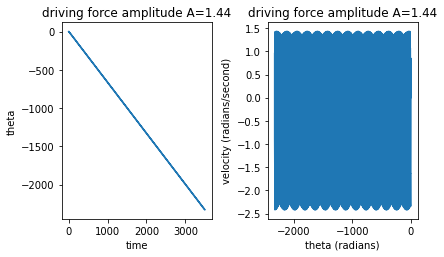

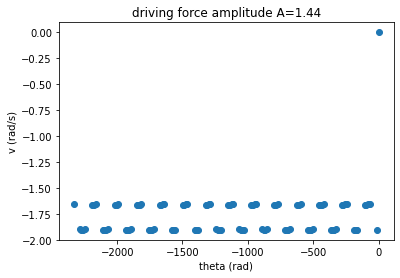

In [13]:
points = True
DeltaT = 0.7
tfinal = 3500
n = ceil(tfinal/DeltaT)
Ftilde = 1.44
title = "driving force amplitude A=1.44"
run_rk4()

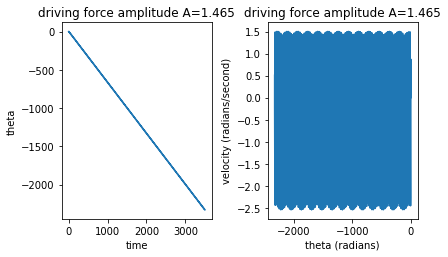

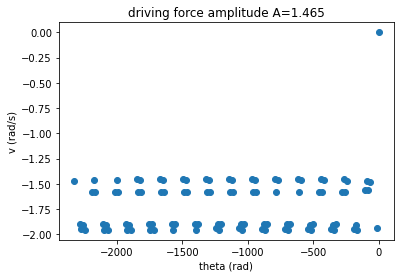

In [14]:
points = True
DeltaT = 0.7
tfinal = 3500
n = ceil(tfinal/DeltaT)
Ftilde = 1.465
title = "driving force amplitude A=1.465"
run_rk4()

With the above plots we see essentially a horizontal line (or set of horizontal lines), which I believe is what we'd expect. Since we're selecting cases where wt = 2n*pi, we're seeing spots that are at around the same point in the driving force cycle. This means that each time around we'll be at the same angular velocity, but continuously moving to farther negative theta values. I think the reason for multiple horizontal lines in the plot is due to the nature of .01 as my tolerance for being close enough to an integer.

### Exercise 2 (20pt), Center-of-Mass and Relative Coordinates and Reference Frames

We define the two-body center-of-mass coordinate and relative coordinate by expressing the trajectories for
$\boldsymbol{r}_1$ and $\boldsymbol{r}_2$ into the center-of-mass coordinate
$\boldsymbol{R}_{\rm cm}$

$$
\boldsymbol{R}_{\rm cm}\equiv\frac{m_1\boldsymbol{r}_1+m_2\boldsymbol{r}_2}{m_1+m_2},
$$

and the relative coordinate

$$
\boldsymbol{r}\equiv\boldsymbol{r}_1-\boldsymbol{r_2}.
$$

Here, we assume the two particles interact only with one another, so $\boldsymbol{F}_{12}=-\boldsymbol{F}_{21}$ (where $\boldsymbol{F}_{ij}$ is the force on $i$ due to $j$.

* 2a (5pt) Show that the equations of motion then become $\ddot{\boldsymbol{R}}_{\rm cm}=0$ and $\mu\ddot{\boldsymbol{r}}=\boldsymbol{F}_{12}$, with the reduced mass $\mu=m_1m_2/(m_1+m_2)$.

The first expression simply states that the center of mass coordinate $\boldsymbol{R}_{\rm cm}$ moves at a fixed velocity. The second expression can be rewritten in terms of the reduced mass $\mu$.

* 2b (5pt) Show that the linear momenta for the center-of-mass $\boldsymbol{P}$ motion and the relative motion $\boldsymbol{q}$ are given by $\boldsymbol{P}=M\dot{\boldsymbol{R}}_{\rm cm}$ with $M=m_1+m_2$ and $\boldsymbol{q}=\mu\dot{\boldsymbol{r}}$.  The linear momentum of the relative motion is defined $\boldsymbol{q} = (m_2\boldsymbol{p}_1-m_1\boldsymbol{p}_2)/(m_1+m_2)$.

* 2c (5pt) Show then the kinetic energy for two objects can then be written as

$$
K=\frac{P^2}{2M}+\frac{q^2}{2\mu}.
$$

* 2d (5pt) Show that the total angular momentum for two-particles in the center-of-mass frame $\boldsymbol{R}=0$, is given by

$$
\boldsymbol{L}=\boldsymbol{r}\times \mu\dot{\boldsymbol{r}}.
$$

### Classical Mechanics Extra Credit Assignment: Scientific Writing and attending Talks

The following gives you an opportunity to earn **five extra credit
points** on each of the remaining homeworks and **ten extra credit points**
on the midterms and finals.  This assignment also covers an aspect of
the scientific process that is not taught in most undergraduate
programs: scientific writing.  Writing scientific reports is how
scientist communicate their results to the rest of the field.  Knowing
how to assemble a well written scientific report will greatly benefit
you in you upper level classes, in graduate school, and in the work
place.

The full information on extra credits is found at <https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/>. There you will also find examples on how to write a scientific article. 
Below you can also find a description on how to gain extra credits by attending scientific talks.

This assignment allows you to gain extra credit points by practicing
your scientific writing.  For each of the remaining homeworks you can
submit the specified section of a scientific report (written about the
numerical aspect of the homework) for five extra credit points on the
assignment.  For the two midterms and the final, submitting a full
scientific report covering the numerical analysis problem will be
worth ten extra points.  For credit the grader must be able to tell
that you put effort into the assignment (i.e. well written, well
formatted, etc.).  If you are unfamiliar with writing scientific
reports, [see the information here](https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/IntroductionScientificWriting.md)

The following table explains what aspect of a scientific report is due
with which homework.  You can submit the assignment in any format you
like, in the same document as your homework, or in a different one.
Remember to cite any external references you use and include a
reference list.  There are no length requirements, but make sure what
you turn in is complete and through.  If you have any questions,
please contact Julie Butler at butler@frib.msu.edu.

<table class="dotable" border="1">
<thead>
<tr><th align="center">  HW/Project </th> <th align="center">Due Date</th> <th align="center">Extra Credit Assignment</th> </tr>
</thead>
<tbody>
<tr><td align="center">   HW 3             </td> <td align="center">   2-8         </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   HW 4             </td> <td align="center">   2-15        </td> <td align="center">   Introduction               </td> </tr>
<tr><td align="center">   HW 5             </td> <td align="center">   2-22        </td> <td align="center">   Methods                    </td> </tr>
<tr><td align="center">   HW 6             </td> <td align="center">   3-1         </td> <td align="center">   Results and Discussion     </td> </tr>
<tr><td align="center">   **Midterm 1**    </td> <td align="center">   **3-12**    </td> <td align="center">   *Full Written Report*      </td> </tr>
<tr><td align="center">   HW 7             </td> <td align="center">   3-22        </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   HW 8             </td> <td align="center">   3-29        </td> <td align="center">   Introduction               </td> </tr>
<tr><td align="center">   HW 9             </td> <td align="center">   4-5         </td> <td align="center">   Results and Discussion     </td> </tr>
<tr><td align="center">   **Midterm 2**    </td> <td align="center">   **4-16**    </td> <td align="center">   *Full Written Report*      </td> </tr>
<tr><td align="center">   HW 10            </td> <td align="center">   4-26        </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   **Final**        </td> <td align="center">   **4-30**    </td> <td align="center">   *Full Written Report*      </td> </tr>
</tbody>
</table>

You can also gain extra credits if you attend scientific talks.
This is described here.

### Integrating Classwork With Research

This opportunity will allow you to earn up to 5 extra credit points on a Homework per week. These points can push you above 100% or help make up for missed exercises.
In order to earn all points you must:

1. Attend an MSU research talk (recommended research oriented Clubs is  provided below)

2. Summarize the talk using at least 150 words

3. Turn in the summary along with your Homework.

Approved talks:
Talks given by researchers through the following clubs:
* Research and Idea Sharing Enterprise (RAISE)​: Meets Wednesday Nights Society for Physics Students (SPS)​: Meets Monday Nights

* Astronomy Club​: Meets Monday Nights

* Facility For Rare Isotope Beam (FRIB) Seminars: ​Occur multiple times a week

If you have any questions please consult Jeremy Rebenstock, rebensto@msu.edu.

All the material on extra credits is at <https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/>.